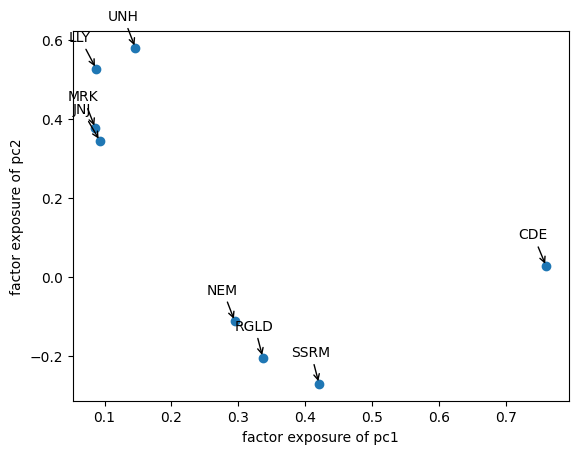

In [68]:
# identify latent return driver using pca
from sklearn.decomposition import PCA
from openbb import obb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

obb.user.preferences.output_type = 'dataframe'

symbols =  ["NEM", "RGLD", "SSRM", "CDE", "LLY", "UNH", "JNJ", "MRK"]
data = obb.equity.price.historical(
    symbols,
    start_date='2020-01-01',
    end_date='2020-12-31',
    provider='yfinance'
).pivot(columns='symbol', values='close')
returns = data.pct_change().dropna()
pca = PCA(n_components=3)
pca.fit(returns)

evr = pca.explained_variance_ratio_
cmp = pca.components_
cum_pct = np.cumsum(evr)
# x = np.arange(1, len(evr) + 1, 1)
# plt.subplot(1, 2, 1)
# plt.bar(x, evr * 100, align='center')
# plt.title('cumulative (%)')
# plt.xticks(x)
# plt.xlim([0, 4])
# plt.ylim([0, 100])
# plt.subplot(1, 2, 2)
# plt.plot(x, cum_pct * 100, 'ro-')
# plt.title('cumulative (%)')
# plt.xticks(x)
# plt.xlim([0, 4])
# plt.ylim([0, 100])

X = np.asarray(returns)
factor_return = X.dot(cmp.T)
factor_return = pd.DataFrame(
    columns=['f1', 'f2', 'f3'],
    index=returns.index,
    data=factor_return
)

factor_exposure = pd.DataFrame(
    index=['f1', 'f2', 'f3'],
    columns=returns.columns,
    data=cmp
).T

labels = factor_exposure.index
data = factor_exposure.values

plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of pc1')
plt.ylabel('factor exposure of pc2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords='offset points',
        arrowprops=dict(
            arrowstyle='->',
            connectionstyle='arc3, rad=0'
        ),
    )